<a href="https://colab.research.google.com/github/LuanaLeite/TG-EDUCACAO/blob/main/TG2_educacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Trabalho em Grupo - Entrega 2 - Dimensão: educação***


> **Alunos**: Gabriela Hubner, Luana Leite e Matilde Westphal 
> **Repositório**: https://github.com/LuanaLeite/TG-EDUCACAO

# **Metodologia**


## *Escolha das informações*




A escolha das informações selecionadas tem como objetivo identificar o perfil demográfico dos habitantes de cada cidade brasileira. Nesse sentido, informações como idade, gênero, renda e educação foram coletadas.  

Entendemos que para a realização de uma análise completa, ainda é necessário encontrar novas bases de informações para compreender outras questões relacionadas ao contexto da cidade como, por exemplo, unidades educacionais e industria local. Esses dados ainda não estão inclusos nessa primeira análise. 

## *Dicionário de variáveis*

As variáveis selecionadas para a realização do trabalho se encontram neste [arquivo](https://docs.google.com/spreadsheets/d/13ynlZniRJeRXe4KTpLZjQB-dE3ZRejLeVpx95cevE5c/edit?usp=sharing).

## *Seleção das bases*

As bases selecionadas para a primeira versão da análise foram do IBGE, do censo de 2010. Para os 27 estados do país, foram coletados os seguintes dados a nível municipal: 

**Trabalho e Rendimento**
*   **Tabela 1** - Pessoas de 10 anos ou mais de idade, por grupos de idade;
*   **Tabela 2** - Pessoas de 10 anos ou mais de idade, por condição de aposentada ou pensionista de instituto de previdência oficial, no mês de referência, e sexo;
* **Tabela 3** - Pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho, e valor do rendimento nominal médio e mediano mensal de todos os trabalhos das pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento de trabalho, por condição de contribuição para instituto de previdência oficial em qualquer trabalho, segundo as mesorregiões, as microrregiões e os municípios; 
* **Tabela 4** - Valor do rendimento nominal médio mensal do trabalho principal das pessoas de 10 anos ou mais de idade, ocupadas na semana de referência, com rendimento do trabalho principal, por posição na ocupação e categoria do emprego no trabalho principal; 

**Educação e deslocamento**

* **Tabela 5** - Pessoas que frequentavam escola ou creche, por grupos de idade;
* **Tabela 6** - Pessoas que não frequentavam escola ou creche, por grupos de idade;
* **Tabela  7** - Pessoas que frequentavam escola ou creche da rede pública, por curso que frequentavam;
* **Tabela 8** - Pessoas que frequentavam escola ou creche da rede particular, por curso que frequentavam;
*  **Tabela 9** - Pessoas de 25 anos ou mais de idade, por sexo e nível de instrução;

**Indicadores sociais municipais**
* **Tabela 10** - População residente, total e respectiva distribuição percentual, por situação do domicílio e sexo, e razão de sexo. 





## *Coleta e pré-processamento*


Foi realizado o download de todas as tabelas citadas anteriormente, dos 27 estados do país. Em um excel, o grupo reuniu todas as tabelas, adicionando novas colunas e informações, tomando o devido cuidado para que as informações fossem atribuidas a cada cidade corretamente. Foi necessária fazer a substituição de informações como traços "-" para valores em branco para conseguir padronizar a ausencia dessas informações em todas as colunas.  
Após a compilação de todas as cidades do país em único arquivo, salvamos o documento em CSV e realizamos o branch no repositório do GitHub.

# Bibliotecas 

In [398]:
# Common standard libraries

import datetime
import time
import os

In [399]:
# Common external libraries

import pandas as pd
import numpy as np
import sklearn # scikit-learn
import requests
from bs4 import BeautifulSoup
import math 

In [400]:
# Visualization libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [401]:
# Setting plot appearance

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

# Importação dos dados

In [402]:
# GitHub
df = pd.read_csv('https://raw.githubusercontent.com/LuanaLeite/TG-EDUCACAO/main/base_dados_br_7.csv', sep=';')

# Análises iniciais dos dados importados

In [403]:
df.shape

(5565, 83)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 83 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Cidade                   5565 non-null   object 
 1   Estado                   5565 non-null   object 
 2   jovens                   5565 non-null   int64  
 3   adultos                  5565 non-null   int64  
 4   idosos                   5565 non-null   int64  
 5   aposent_ocup             5565 non-null   int64  
 6   aposent_nocup            5565 non-null   int64  
 7   naposent_ocup            5565 non-null   int64  
 8   naposent_nocup           5565 non-null   int64  
 9   contrib_prev             5565 non-null   int64  
 10  ncontrib_prev            5565 non-null   int64  
 11  rend_empreg_clt          5565 non-null   int64  
 12  rend_funcpubl            5565 non-null   int64  
 13  rend_empreg_nclt         5565 non-null   int64  
 14  rend_autonomos          

In [405]:
print(df)

              Cidade     Estado  jovens  adultos  idosos  aposent_ocup  \
0         Acrelândia       Acre    2930     6081   10376          4603   
1       Assis Brasil       Acre    1344     2856    4811          1991   
2          Brasiléia       Acre    4736    10701   17937          8037   
3             Bujari       Acre    1916     4095    7046          3231   
4           Capixaba       Acre    2113     4089    7215          3871   
...              ...        ...     ...      ...     ...           ...   
5560  Tocantinópolis  Tocantins    4822    11230   19303           614   
5561        Tupirama  Tocantins     326      821    1374            32   
5562      Tupiratins  Tocantins     452     1029    1859           128   
5563    Wanderlândia  Tocantins    2146     5713    9584           268   
5564         Xambioá  Tocantins    2473     5864   10000           213   

      aposent_nocup  naposent_ocup  naposent_nocup  contrib_prev  ...  \
0              5240           4345    

In [406]:
df.head()

,Cidade,Estado,jovens,adultos,idosos,aposent_ocup,aposent_nocup,naposent_ocup,naposent_nocup,contrib_prev,...,ser_inic_rur,ser_fin_urb,ser_fin_rur,temp_int,ed_espec,aee,eja_aval_proc,ed_ind_quil,est_rec,coef_distrib
0,Acrelândia,Acre,2930,6081,10376,4603,5240,4345,4453,1422,...,345,0,148,82,62,49.0,73,0,10222847.06,0.008886
1,Assis Brasil,Acre,1344,2856,4811,1991,2608,1927,2369,749,...,462,0,0,0,71,33.0,65,0,6987079.74,0.006074
2,Brasiléia,Acre,4736,10701,17937,8037,9004,7519,7543,2366,...,815,0,0,0,118,68.0,0,0,14342671.13,0.012468
3,Bujari,Acre,1916,4095,7046,3231,3408,2997,2875,1066,...,367,0,149,0,36,0.0,0,0,8115711.09,0.007055
4,Capixaba,Acre,2113,4089,7215,3871,2951,3590,2534,1028,...,456,235,0,0,47,19.0,267,0,9227020.13,0.008021


In [407]:
df[['Cidade']].describe()

,Cidade
count,5565
unique,5292
top,Bom Jesus
freq,5


In [408]:
df[['Estado']].describe()

,Estado
count,5565
unique,27
top,Minas Gerais
freq,853


In [409]:
# mostra as informações de estado agrupadas 
df.groupby(['Estado']).sum()

,jovens,adultos,idosos,aposent_ocup,aposent_nocup,naposent_ocup,naposent_nocup,contrib_prev,ncontrib_prev,rend_empreg_clt,...,ser_inic_rur,ser_fin_urb,ser_fin_rur,temp_int,ed_espec,aee,eja_aval_proc,ed_ind_quil,est_rec,coef_distrib
Estado,,,,,,,,,,,,,,,,,,,,,
Acre,164688,362420,600748,279286,294622,264578,251000,131150,112577,22031,...,18489,2455,4327,3096,3291,1749.5,4290,2236,4.608802e+08,0.400624
Alagoas,650827,1620728,2704088,72484,266725,1048668,1158316,510712,437288,73810,...,55694,77743,26010,62143,16115,8561.0,84338,8387,2.128048e+09,0.746219
Amapá,152348,339893,547050,9652,25910,250774,240292,130529,112197,17562,...,6643,2654,374,2106,2137,1568.5,3899,1807,3.852471e+08,0.388575
Amazonas,765458,1752705,2849465,62953,152150,1259111,1252398,600729,543875,63596,...,65785,70329,40967,29586,10601,2954.5,32166,58679,2.432916e+09,0.566104
Bahia,2665894,7648223,12541443,407117,1215526,5430446,4704189,2572904,2498441,310198,...,248251,365089,135734,191874,67901,25432.0,183653,49887,8.648263e+09,0.729814
Ceará,1694128,4507971,7584126,223394,787101,3136566,2960799,1451637,1498479,127781,...,80658,178310,42236,355896,39396,21728.5,72218,4351,5.542018e+09,0.771325
Distrito Federal,439270,1543621,2299507,69595,161287,1215628,731109,941613,319622,1863,...,7518,107945,5607,19836,11387,6892.0,39647,0,2.171862e+09,1.000000
Espírito Santo,603899,2037094,3205320,105436,314324,1588158,996477,1070238,542707,69018,...,25660,95286,11487,14648,18426,5990.0,16357,2181,2.206933e+09,0.679030
Goiás,1064633,3467600,5416873,155898,444789,2801283,1687271,1716782,1128205,222350,...,17016,76478,7413,36412,18772,8962.5,18362,7697,3.006459e+09,0.568127


In [410]:
df.tail()

,Cidade,Estado,jovens,adultos,idosos,aposent_ocup,aposent_nocup,naposent_ocup,naposent_nocup,contrib_prev,...,ser_inic_rur,ser_fin_urb,ser_fin_rur,temp_int,ed_espec,aee,eja_aval_proc,ed_ind_quil,est_rec,coef_distrib
5560,Tocantinópolis,Tocantins,4822,11230,19303,614,2303,7847,7487,3965,...,85,0,0,338,107,66.0,0,0,11584988.80,0.006345
5561,Tupirama,Tocantins,326,821,1374,32,135,554,568,340,...,0,0,0,0,14,0.0,0,0,1251203.09,0.000685
5562,Tupiratins,Tocantins,452,1029,1859,128,127,847,624,236,...,21,0,0,120,4,2.0,0,0,1511026.81,0.000828
5563,Wanderlândia,Tocantins,2146,5713,9584,268,884,3817,3994,1510,...,152,0,168,56,53,35.0,0,0,6327551.31,0.003465
5564,Xambioá,Tocantins,2473,5864,10000,213,951,4068,4232,1960,...,36,222,0,22,34,16.5,64,0,7464926.86,0.004088


In [411]:
## identificando dados NaN
b = math.nan
print(np.isnan(b))

True


In [412]:
df.isnull().sum()

Cidade             0
Estado             0
jovens             0
adultos            0
idosos             0
                ... 
aee                0
eja_aval_proc      0
ed_ind_quil        0
est_rec            0
coef_distrib     141
Length: 83, dtype: int64

In [413]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
jovens,5565.0,6.137307e+03,3.163446e+04,129.000000,9.780000e+02,2.126000e+03,4.579000e+03,1.708432e+06
adultos,5565.0,1.927018e+04,1.208395e+05,471.000000,2.760000e+03,5.783000e+03,1.225900e+04,6.735659e+06
idosos,5565.0,3.114783e+04,1.895799e+05,767.000000,4.784000e+03,9.880000e+03,2.076300e+04,1.051196e+07
aposent_ocup,5565.0,1.124395e+03,7.336495e+03,9.000000,1.970000e+02,3.850000e+02,7.930000e+02,4.087710e+05
aposent_nocup,5565.0,3.135084e+03,1.810770e+04,39.000000,5.540000e+02,1.099000e+03,2.245000e+03,9.288710e+05
...,...,...,...,...,...,...,...,...
aee,5565.0,5.008634e+01,1.931332e+02,0.000000,0.000000e+00,1.000000e+01,3.600000e+01,6.892000e+03
eja_aval_proc,5565.0,2.195633e+02,1.076404e+03,0.000000,0.000000e+00,2.400000e+01,1.640000e+02,4.607500e+04
ed_ind_quil,5565.0,5.511806e+01,2.967412e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.049000e+03
est_rec,5565.0,1.903332e+07,8.845160e+07,112843.590000,3.034496e+06,6.923269e+06,1.615893e+07,4.725714e+09


In [414]:
df.dtypes

Cidade            object
Estado            object
jovens             int64
adultos            int64
idosos             int64
                  ...   
aee              float64
eja_aval_proc      int64
ed_ind_quil        int64
est_rec          float64
coef_distrib     float64
Length: 83, dtype: object

In [415]:
# visualização por colunas de renda
cols_rent = ['rend_empreg_clt', 'rend_funcpubl', 'rend_empreg_nclt', 'rend_autonomos', 'rend_empregador', 'adult_sup_completo']

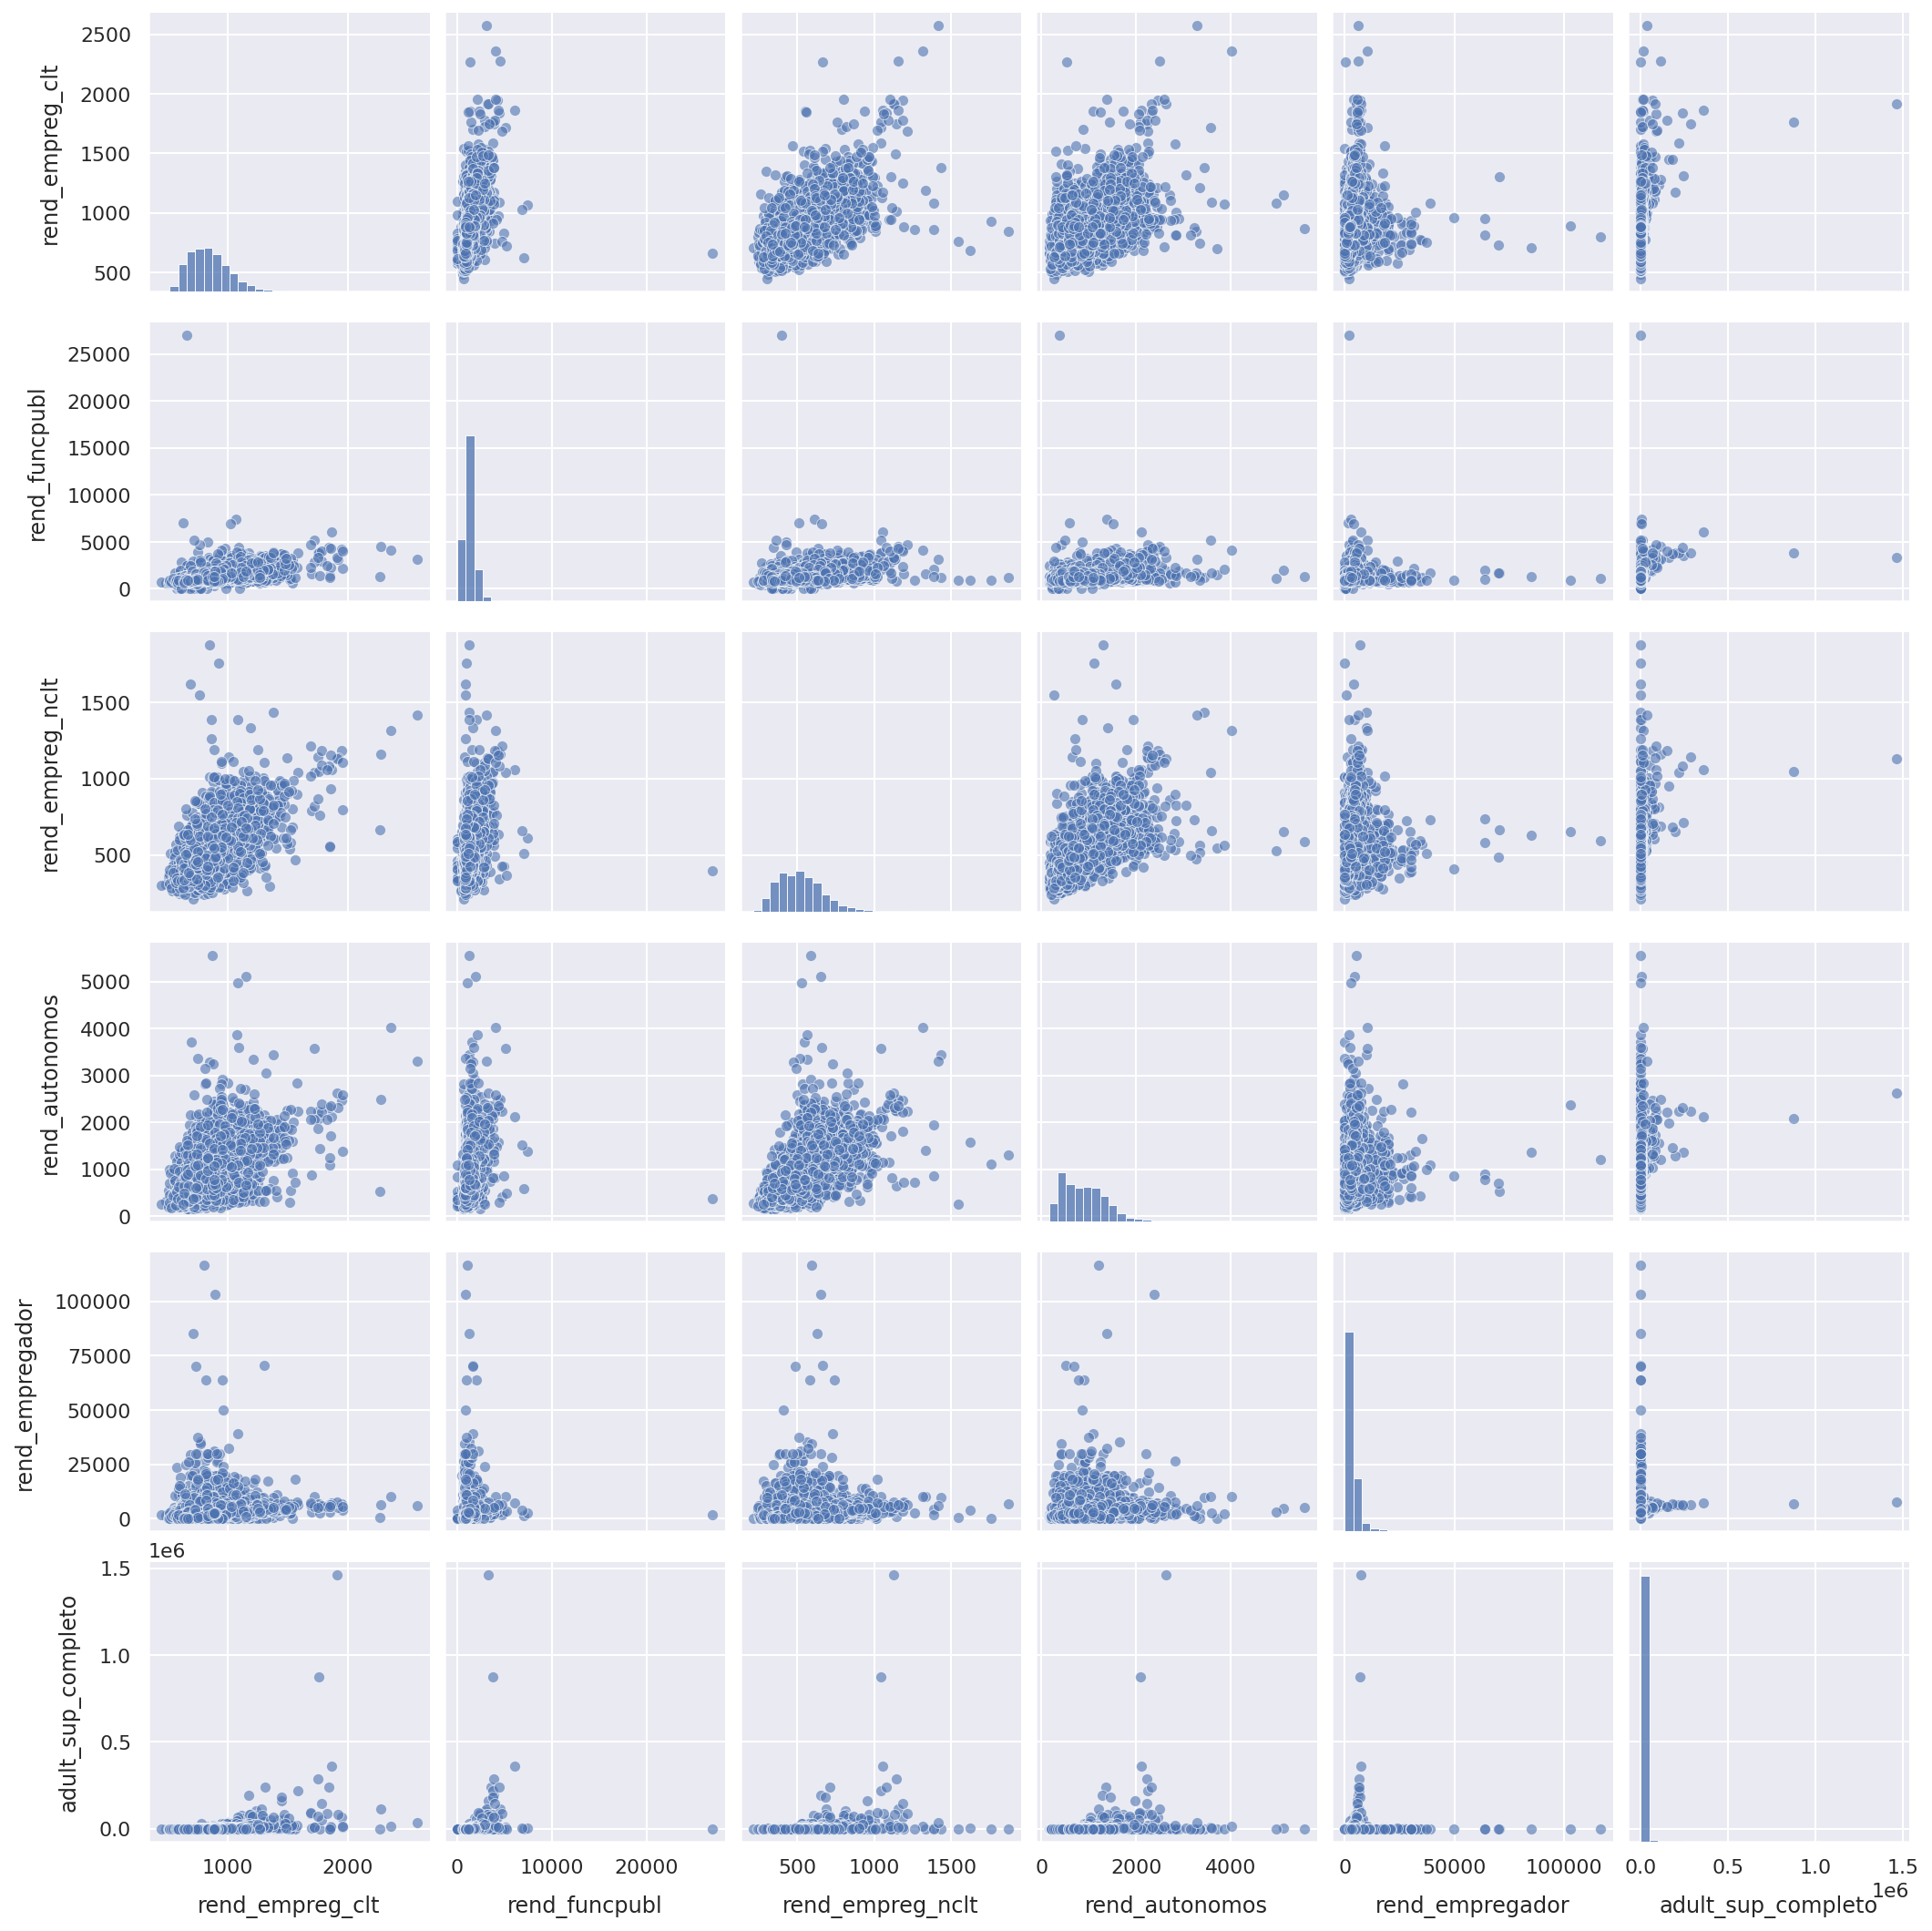

In [416]:
sns.pairplot(df[cols_rent],
              plot_kws={'alpha': 0.6},
              diag_kws={'bins': 30})

In [417]:

pd.DataFrame(
    df.groupby(
        by='Estado'
    )['jovens', 'adultos', 'idosos'].sum()
)

<ipython-input-417-fe9c042c9da2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(


,jovens,adultos,idosos
Estado,,,
Acre,164688,362420,600748
Alagoas,650827,1620728,2704088
Amapá,152348,339893,547050
Amazonas,765458,1752705,2849465
Bahia,2665894,7648223,12541443
Ceará,1694128,4507971,7584126
Distrito Federal,439270,1543621,2299507
Espírito Santo,603899,2037094,3205320
Goiás,1064633,3467600,5416873


In [418]:
pop_renda_faixa_idade = df.groupby(
        by='Estado'
    )['jovens', 'adultos', 'idosos'].sum()

pop_renda_faixa_idade

<ipython-input-418-2ac7edf301af>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pop_renda_faixa_idade = df.groupby(


,jovens,adultos,idosos
Estado,,,
Acre,164688,362420,600748
Alagoas,650827,1620728,2704088
Amapá,152348,339893,547050
Amazonas,765458,1752705,2849465
Bahia,2665894,7648223,12541443
Ceará,1694128,4507971,7584126
Distrito Federal,439270,1543621,2299507
Espírito Santo,603899,2037094,3205320
Goiás,1064633,3467600,5416873


## Renda por estados do Brasil



In [419]:
rend_empreg_clt = df.groupby(
        by='Estado'
    )['rend_empreg_clt'].mean()

rend_empreg_clt

Estado
Acre                   1001.409091
Alagoas                 723.627451
Amapá                  1097.625000
Amazonas               1025.741935
Bahia                   743.880096
Ceará                   694.461957
Distrito Federal       1863.000000
Espírito Santo          884.846154
Goiás                   903.861789
Maranhão                778.751152
Mato Grosso             992.234043
Mato Grosso do Sul      926.615385
Minas Gerais            768.259086
Paraná                  900.984962
Paraíba                 703.878924
Pará                    853.461538
Pernambuco              731.497297
Piauí                   775.790179
Rio Grande do Norte     739.449102
Rio Grande do Sul       897.080645
Rio de Janeiro         1017.402174
Rondonia                946.980769
Roraima                1038.066667
Santa Catarina          971.085324
Sergipe                 775.440000
São Paulo              1019.133333
Tocantins               839.014388
Name: rend_empreg_clt, dtype: float64

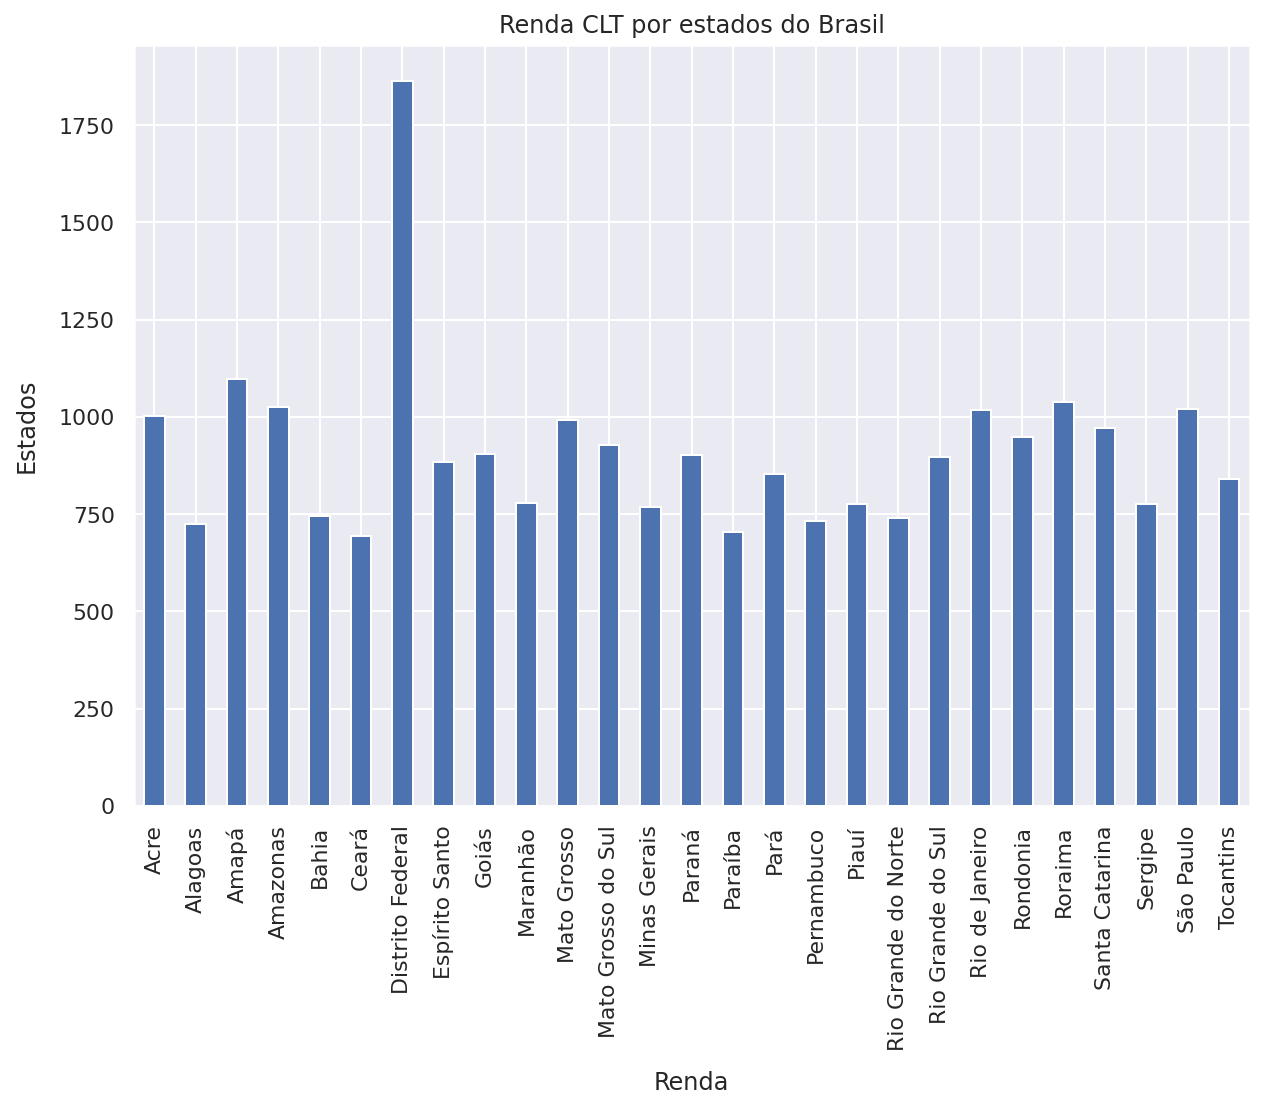

In [420]:
ax = rend_empreg_clt.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda CLT por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [421]:
rend_funcpubl = df.groupby(
        by='Estado'
    )['rend_funcpubl'].mean()

rend_funcpubl

Estado
Acre                   1655.636364
Alagoas                 969.254902
Amapá                  1898.312500
Amazonas               1181.806452
Bahia                  1142.201439
Ceará                  1013.369565
Distrito Federal       6101.000000
Espírito Santo         1525.397436
Goiás                  1294.947154
Maranhão                923.682028
Mato Grosso            1368.460993
Mato Grosso do Sul     1599.141026
Minas Gerais           1106.907386
Paraná                 1616.518797
Paraíba                 918.286996
Pará                   1074.923077
Pernambuco             1072.854054
Piauí                  1058.549107
Rio Grande do Norte    1132.652695
Rio Grande do Sul      1437.897177
Rio de Janeiro         1745.815217
Rondonia               1409.192308
Roraima                1466.333333
Santa Catarina         1611.474403
Sergipe                1180.093333
São Paulo              1757.936434
Tocantins              1175.431655
Name: rend_funcpubl, dtype: float64

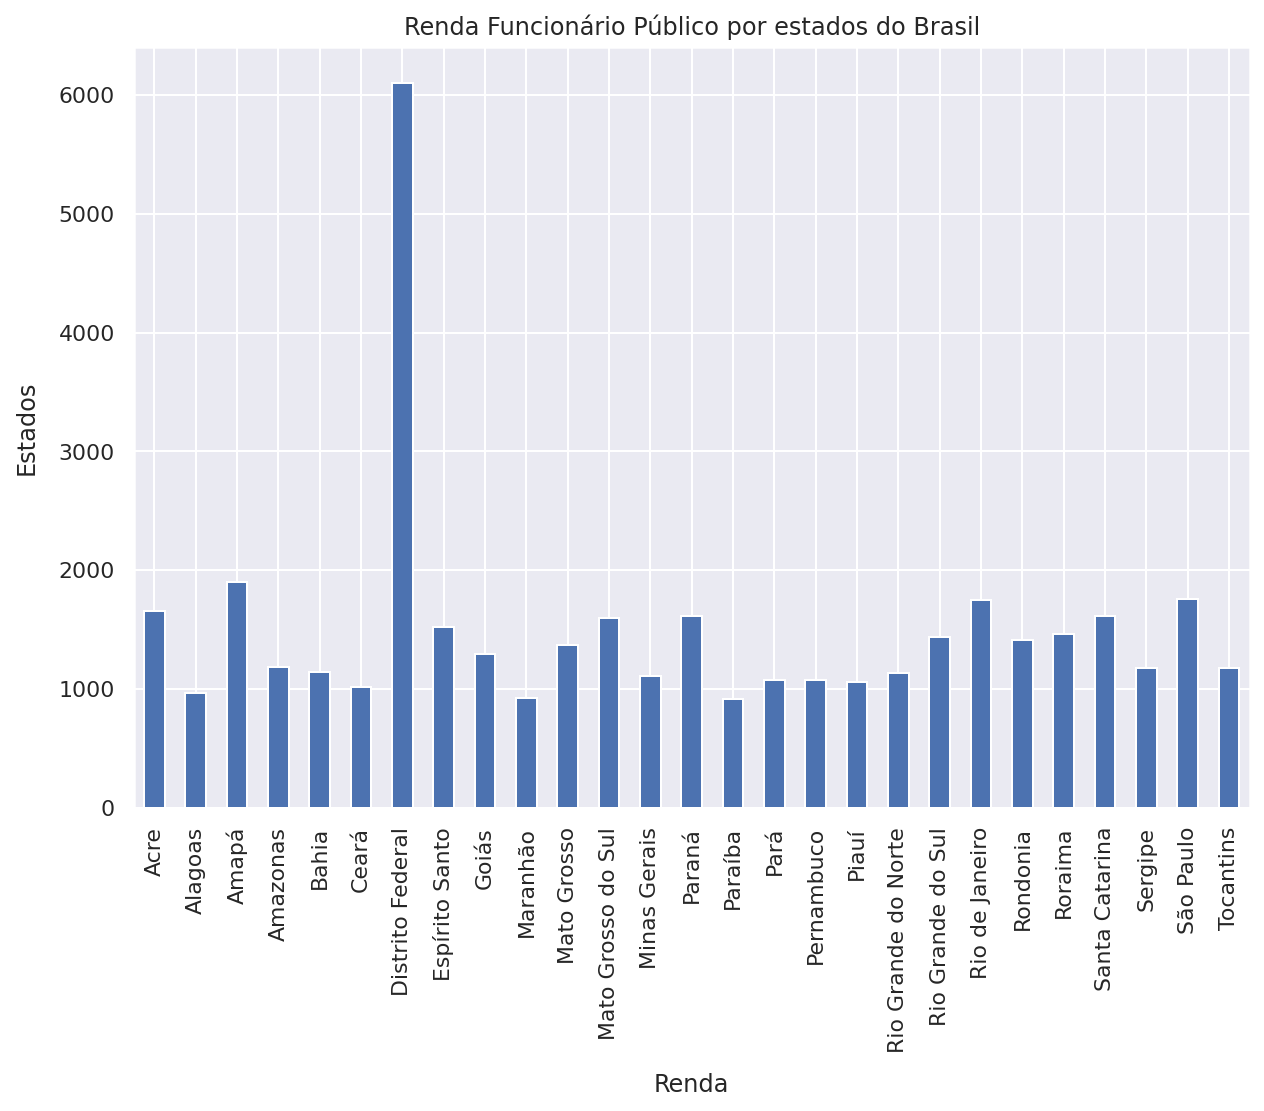

In [422]:
ax = rend_funcpubl.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda Funcionário Público por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [423]:
rend_empreg_nclt = df.groupby(
        by='Estado'
    )['rend_empreg_nclt'].mean()

rend_empreg_nclt

Estado
Acre                    583.454545
Alagoas                 397.598039
Amapá                   641.812500
Amazonas                612.274194
Bahia                   398.417266
Ceará                   367.809783
Distrito Federal       1056.000000
Espírito Santo          552.935897
Goiás                   598.991870
Maranhão                442.631336
Mato Grosso             685.446809
Mato Grosso do Sul      589.025641
Minas Gerais            501.484174
Paraná                  561.338346
Paraíba                 384.219731
Pará                    518.986014
Pernambuco              409.513514
Piauí                   387.142857
Rio Grande do Norte     414.125749
Rio Grande do Sul       609.981855
Rio de Janeiro          619.760870
Rondonia                567.000000
Roraima                 655.933333
Santa Catarina          668.416382
Sergipe                 400.146667
São Paulo               632.862016
Tocantins               536.474820
Name: rend_empreg_nclt, dtype: float64

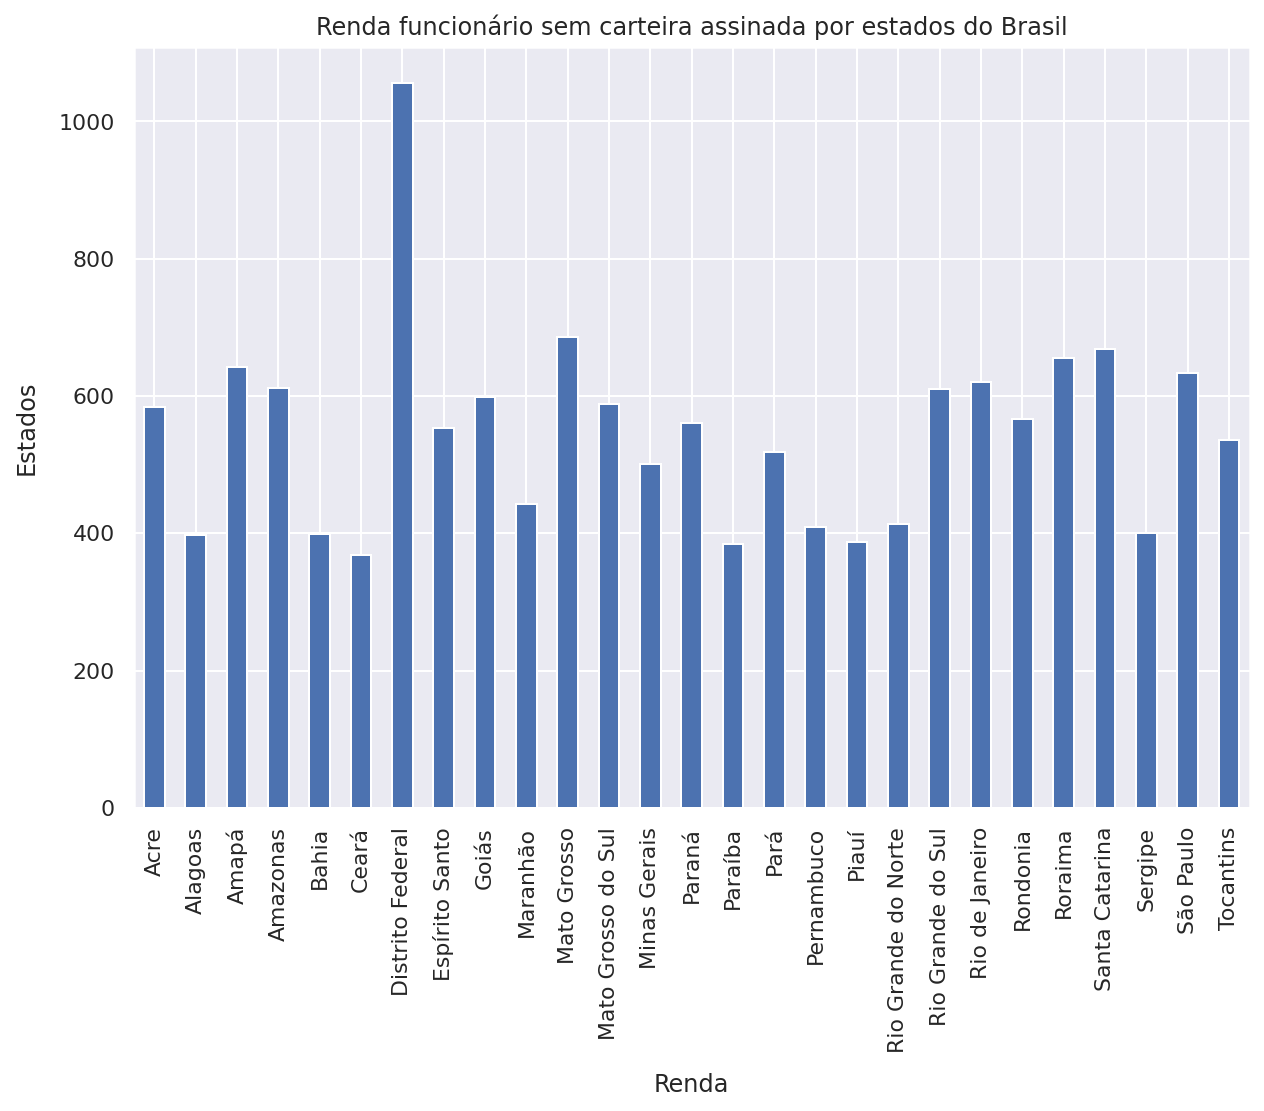

In [424]:
ax = rend_empreg_nclt.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda funcionário sem carteira assinada por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [425]:
rend_autonomos = df.groupby(
        by='Estado'
    )['rend_autonomos'].mean()

rend_autonomos

Estado
Acre                    742.227273
Alagoas                 522.764706
Amapá                   816.937500
Amazonas                617.854839
Bahia                   525.577938
Ceará                   469.923913
Distrito Federal       2119.000000
Espírito Santo          942.743590
Goiás                  1239.430894
Maranhão                472.718894
Mato Grosso            1359.652482
Mato Grosso do Sul     1255.089744
Minas Gerais            957.066823
Paraná                 1130.258145
Paraíba                 457.618834
Pará                    679.426573
Pernambuco              531.416216
Piauí                   415.116071
Rio Grande do Norte     528.029940
Rio Grande do Sul      1123.241935
Rio de Janeiro         1064.141304
Rondonia               1014.403846
Roraima                 853.733333
Santa Catarina         1202.890785
Sergipe                 473.946667
São Paulo              1355.815504
Tocantins               883.884892
Name: rend_autonomos, dtype: float64

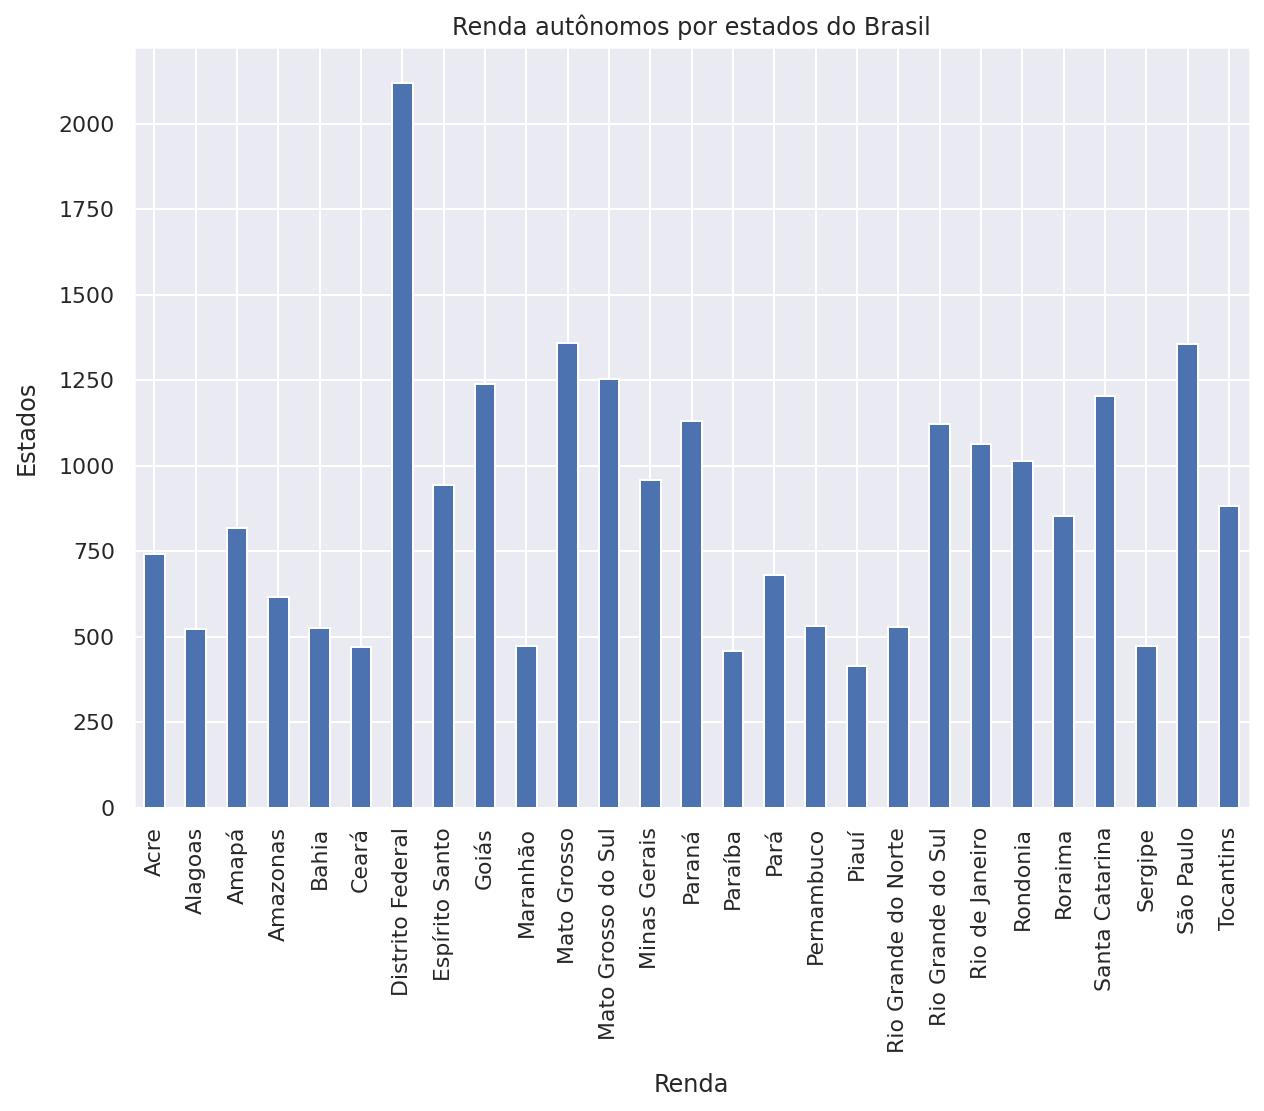

In [426]:
ax = rend_autonomos.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda autônomos por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

In [427]:
rend_empregador = df.groupby(
        by='Estado'
    )['rend_empregador'].mean()

rend_empregador

Estado
Acre                   4568.090909
Alagoas                2317.607843
Amapá                  4914.812500
Amazonas               5110.629032
Bahia                  2508.472422
Ceará                  2088.038043
Distrito Federal       7475.000000
Espírito Santo         3521.166667
Goiás                  4599.471545
Maranhão               2652.156682
Mato Grosso            4310.070922
Mato Grosso do Sul     5108.628205
Minas Gerais           3184.187573
Paraná                 3718.478697
Paraíba                1744.121076
Pará                   4360.902098
Pernambuco             2715.156757
Piauí                  1938.084821
Rio Grande do Norte    2092.892216
Rio Grande do Sul      3775.566532
Rio de Janeiro         3605.565217
Rondonia               4052.192308
Roraima                3020.400000
Santa Catarina         3476.542662
Sergipe                2211.586667
São Paulo              4132.153488
Tocantins              3363.151079
Name: rend_empregador, dtype: float64

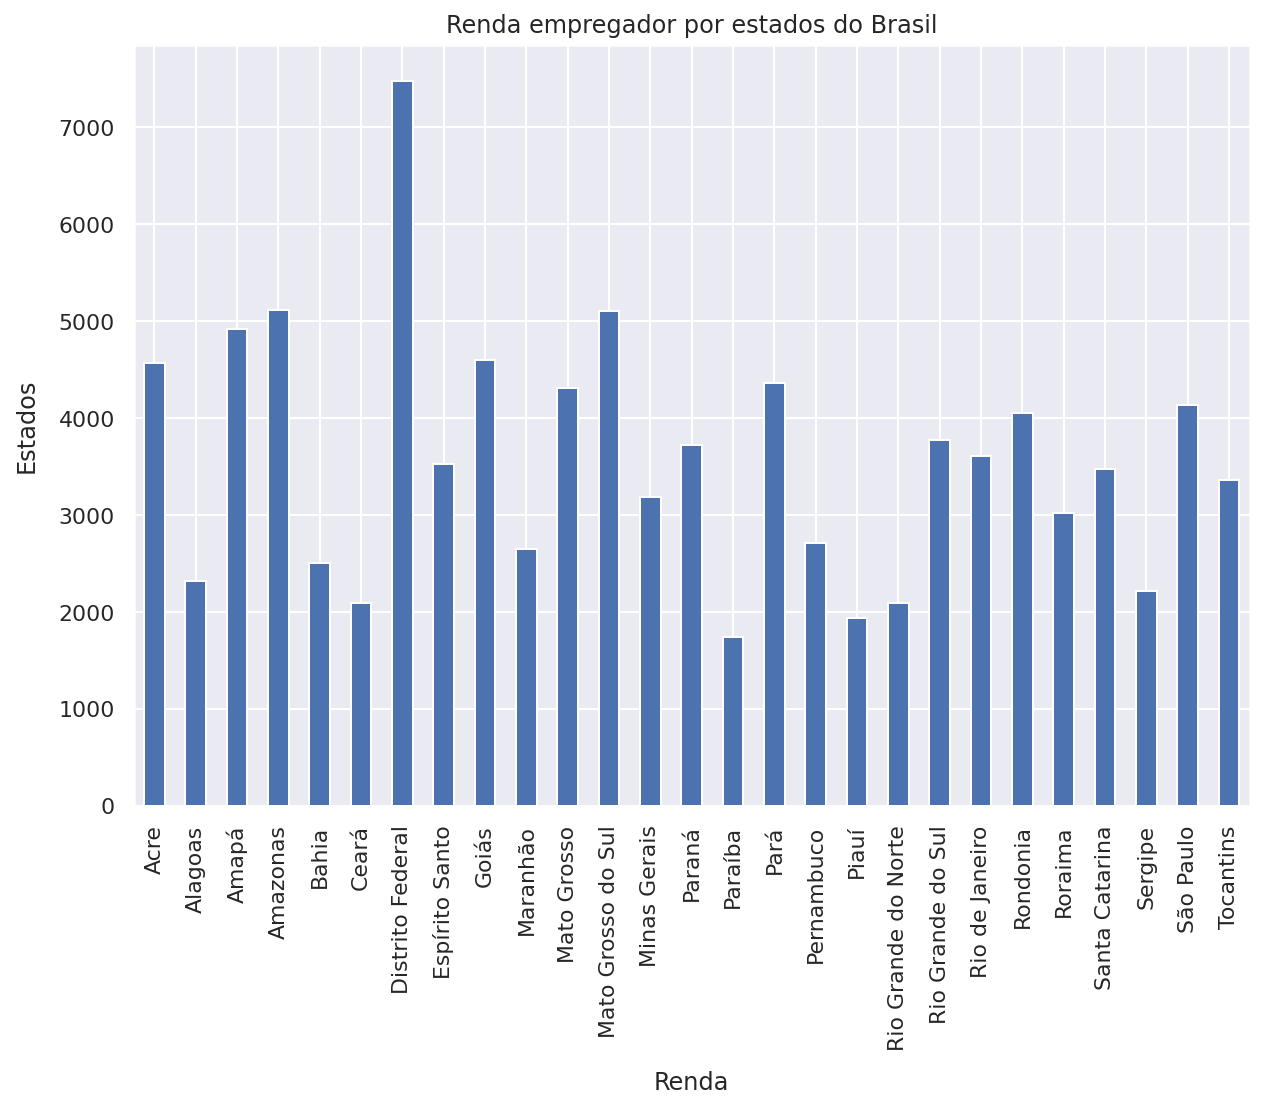

In [428]:
ax = rend_empregador.plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Renda empregador por estados do Brasil')
ax.set_xlabel('Renda')
ax.set_ylabel('Estados')

plt.show()

## Região norte - renda

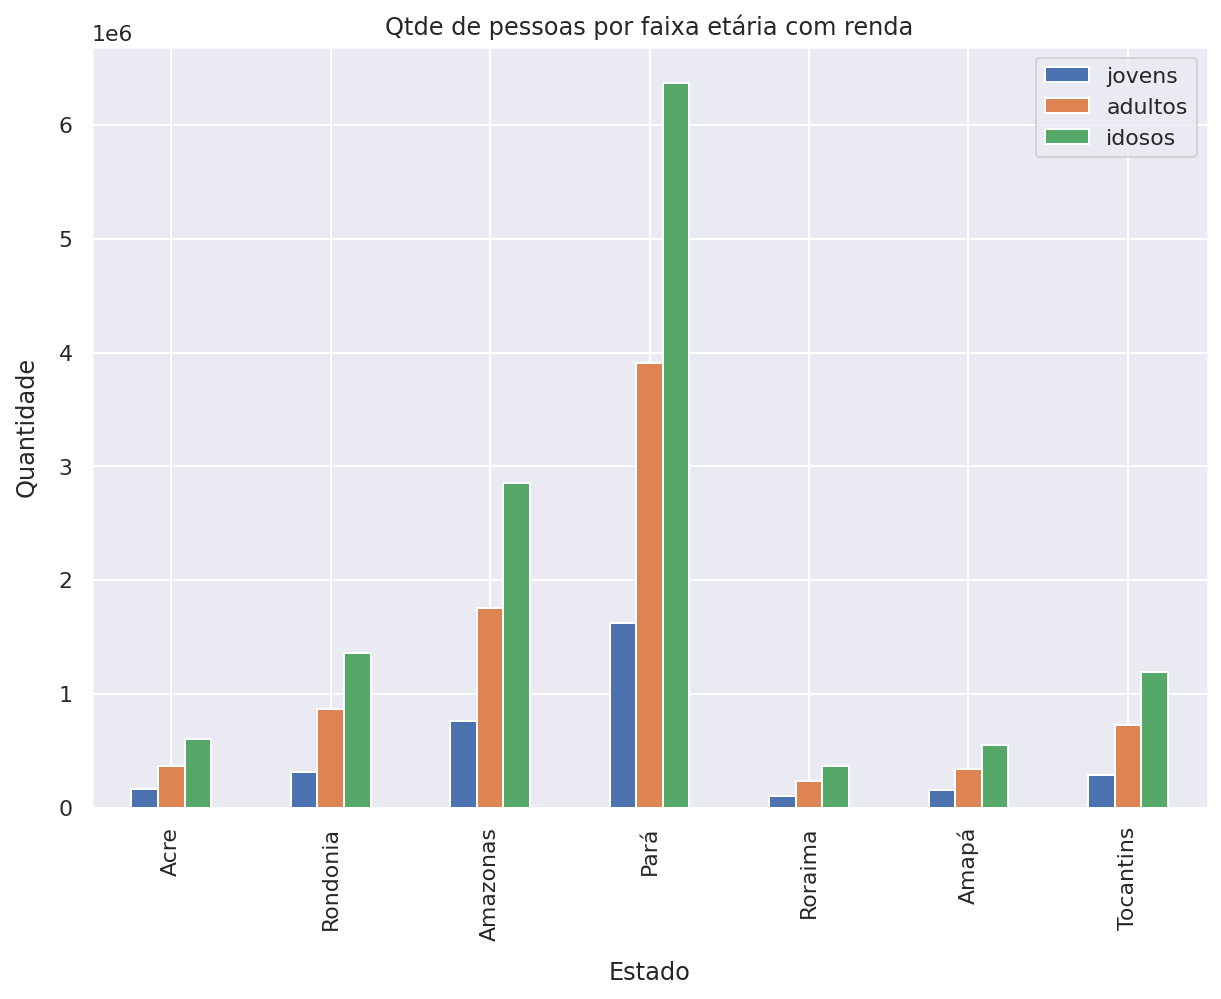

In [429]:
## Renda por faixa etária

ax = pop_renda_faixa_idade.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='bar',
    grid=True,
    figsize=(10, 7),
    title='Qtde de pessoas por faixa etária com renda'
)

ax.set_xlabel('Estado')
ax.set_ylabel('Quantidade')

plt.show()

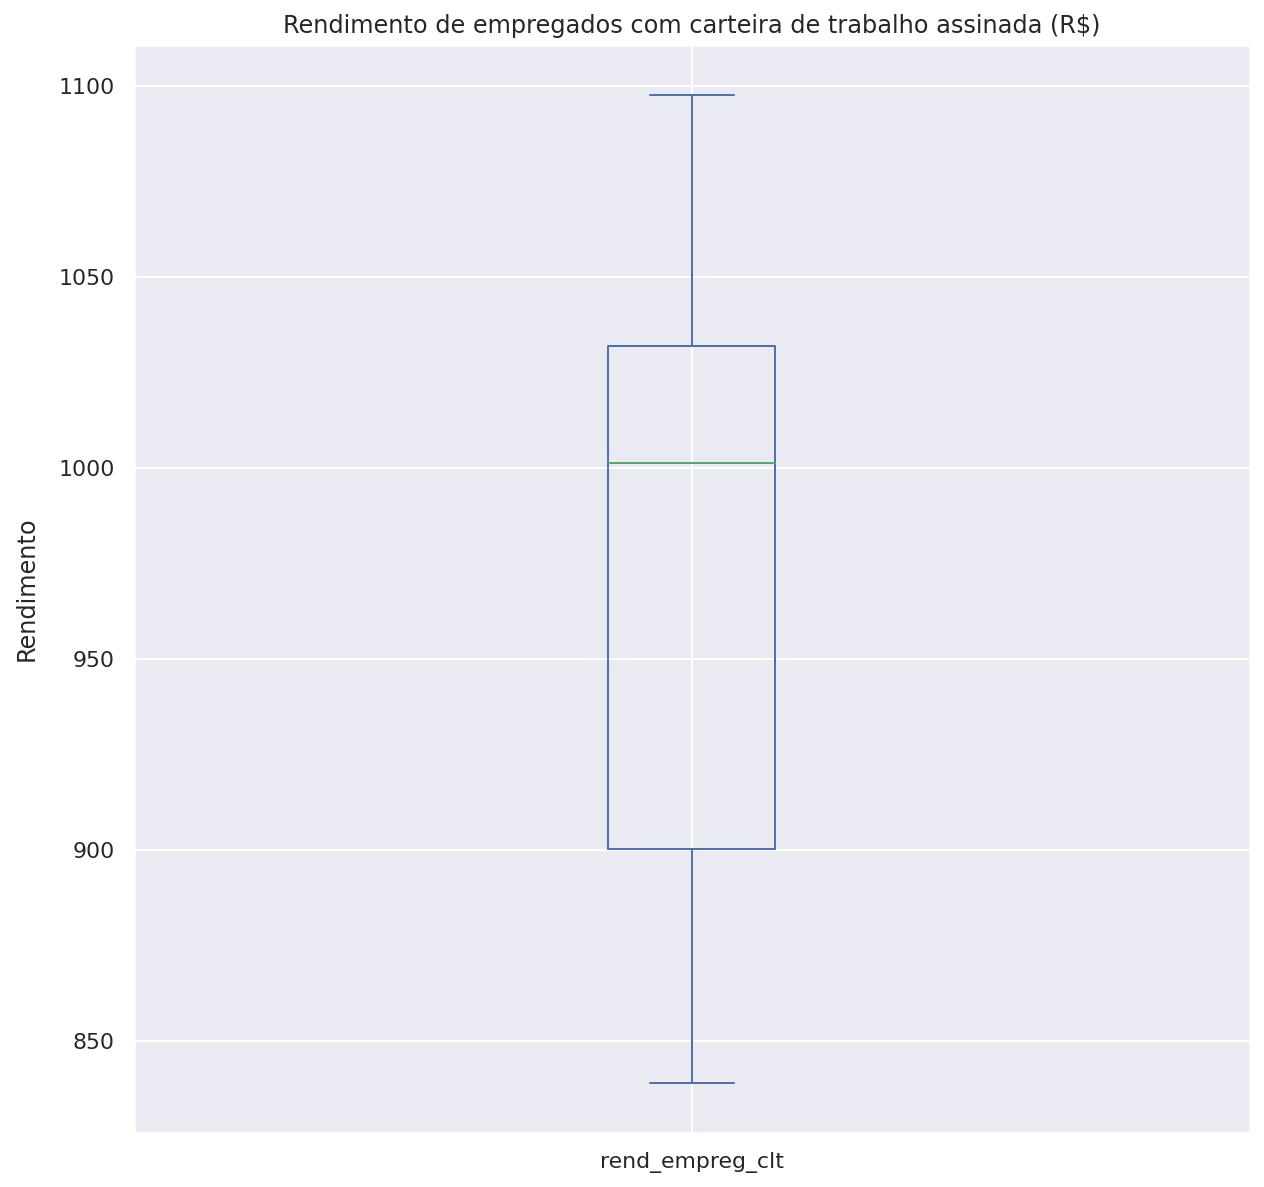

In [430]:
## Renda por empregados CLT

ax = rend_empreg_clt.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de empregados com carteira de trabalho assinada (R$)')

plt.show()

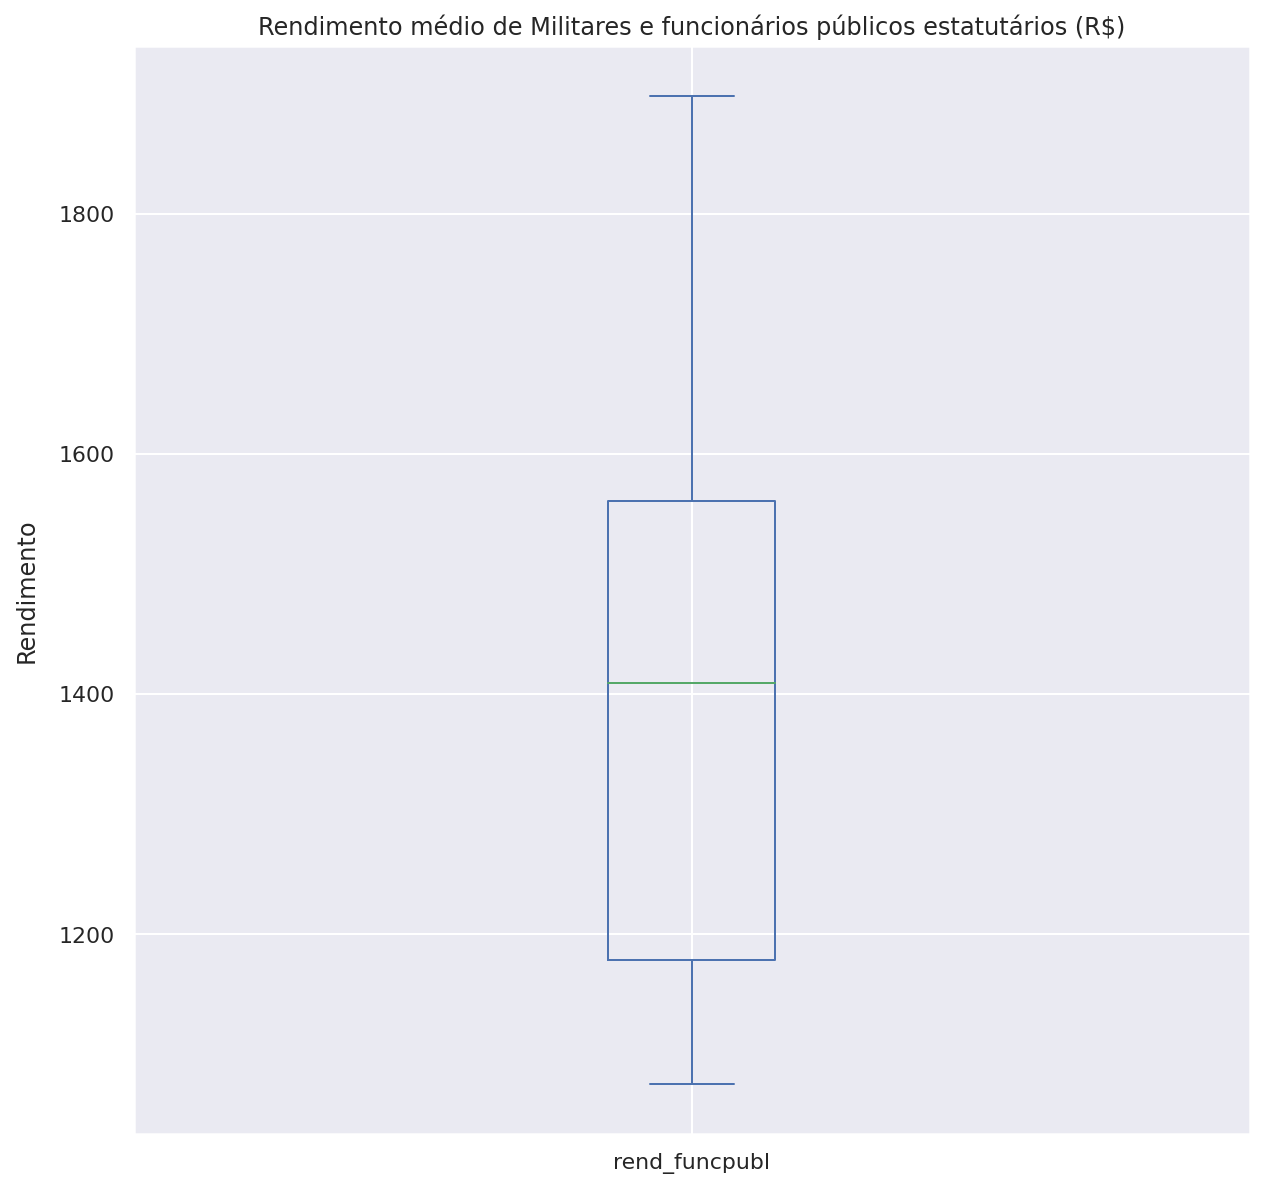

In [431]:
# Renda por funcionário publico
ax = rend_funcpubl.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento médio de Militares e funcionários públicos estatutários (R$)')

plt.show()

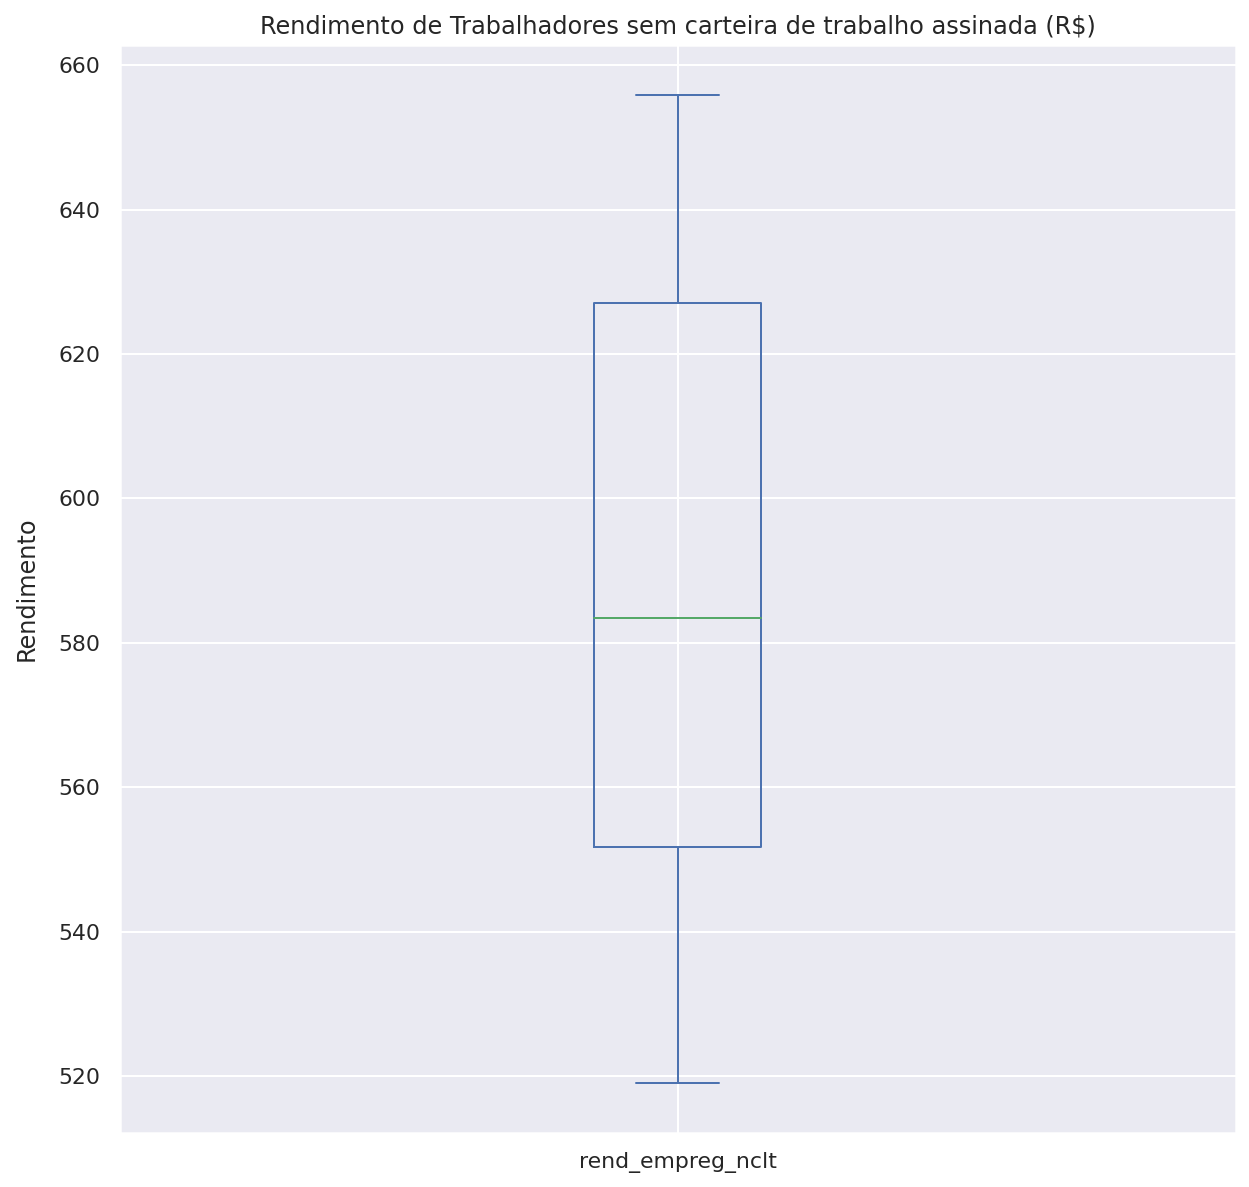

In [432]:
# Renda por funcionário sem carteira assinada 
ax = rend_empreg_nclt.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Trabalhadores sem carteira de trabalho assinada (R$)')

plt.show()

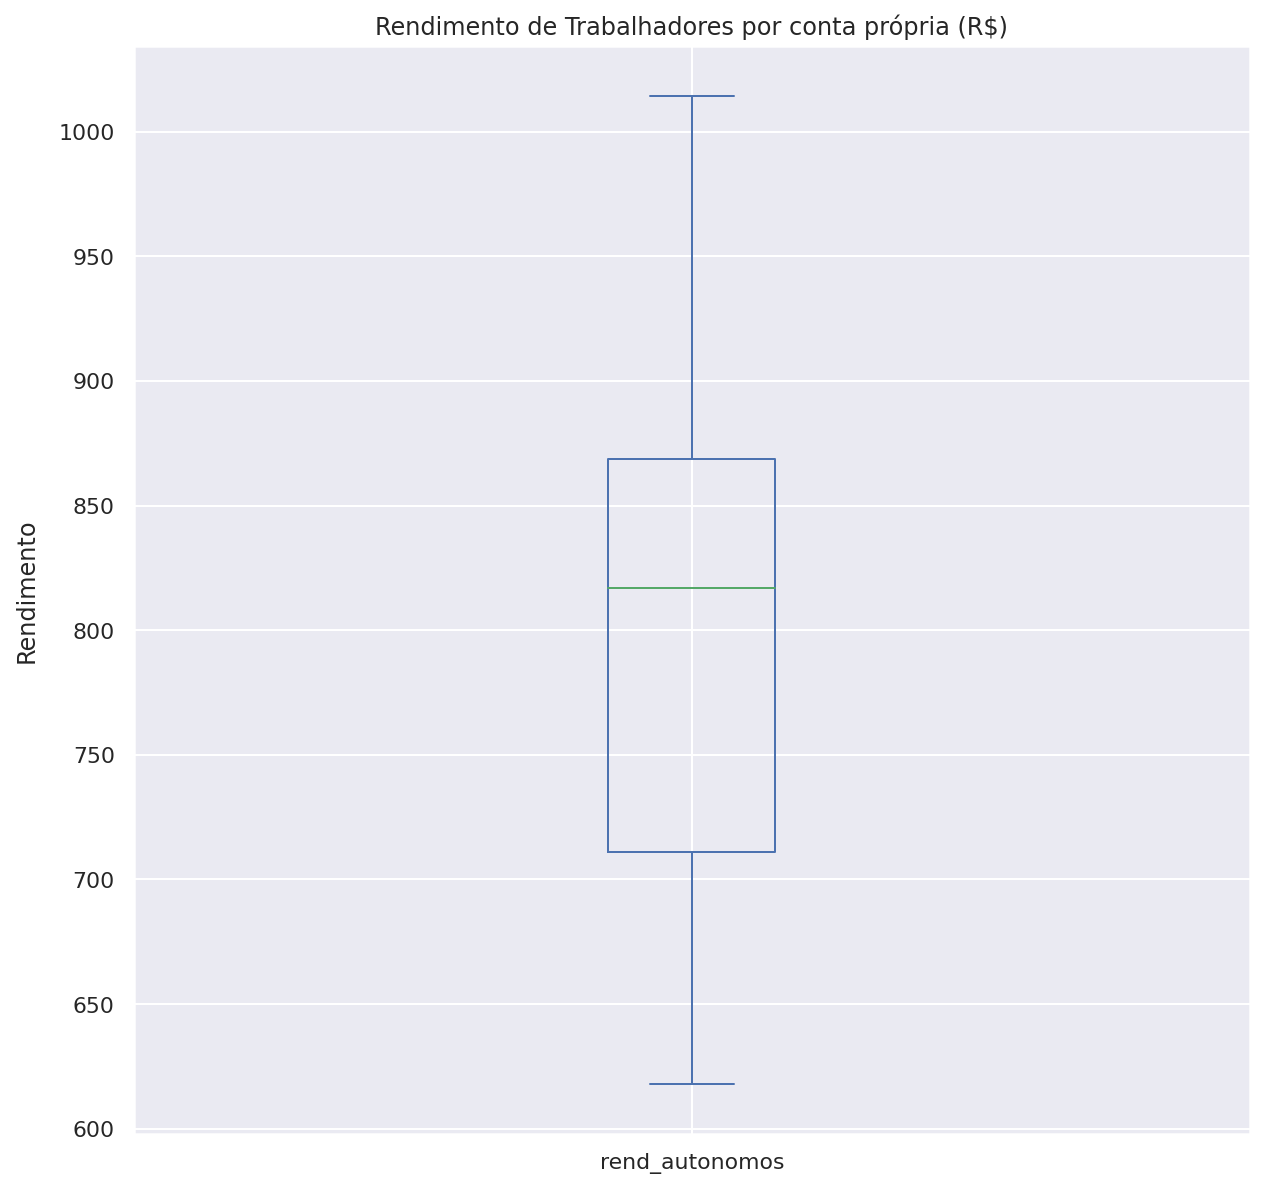

In [433]:
# Renda por autonomos 
ax = rend_autonomos.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Trabalhadores por conta própria (R$)')

plt.show()

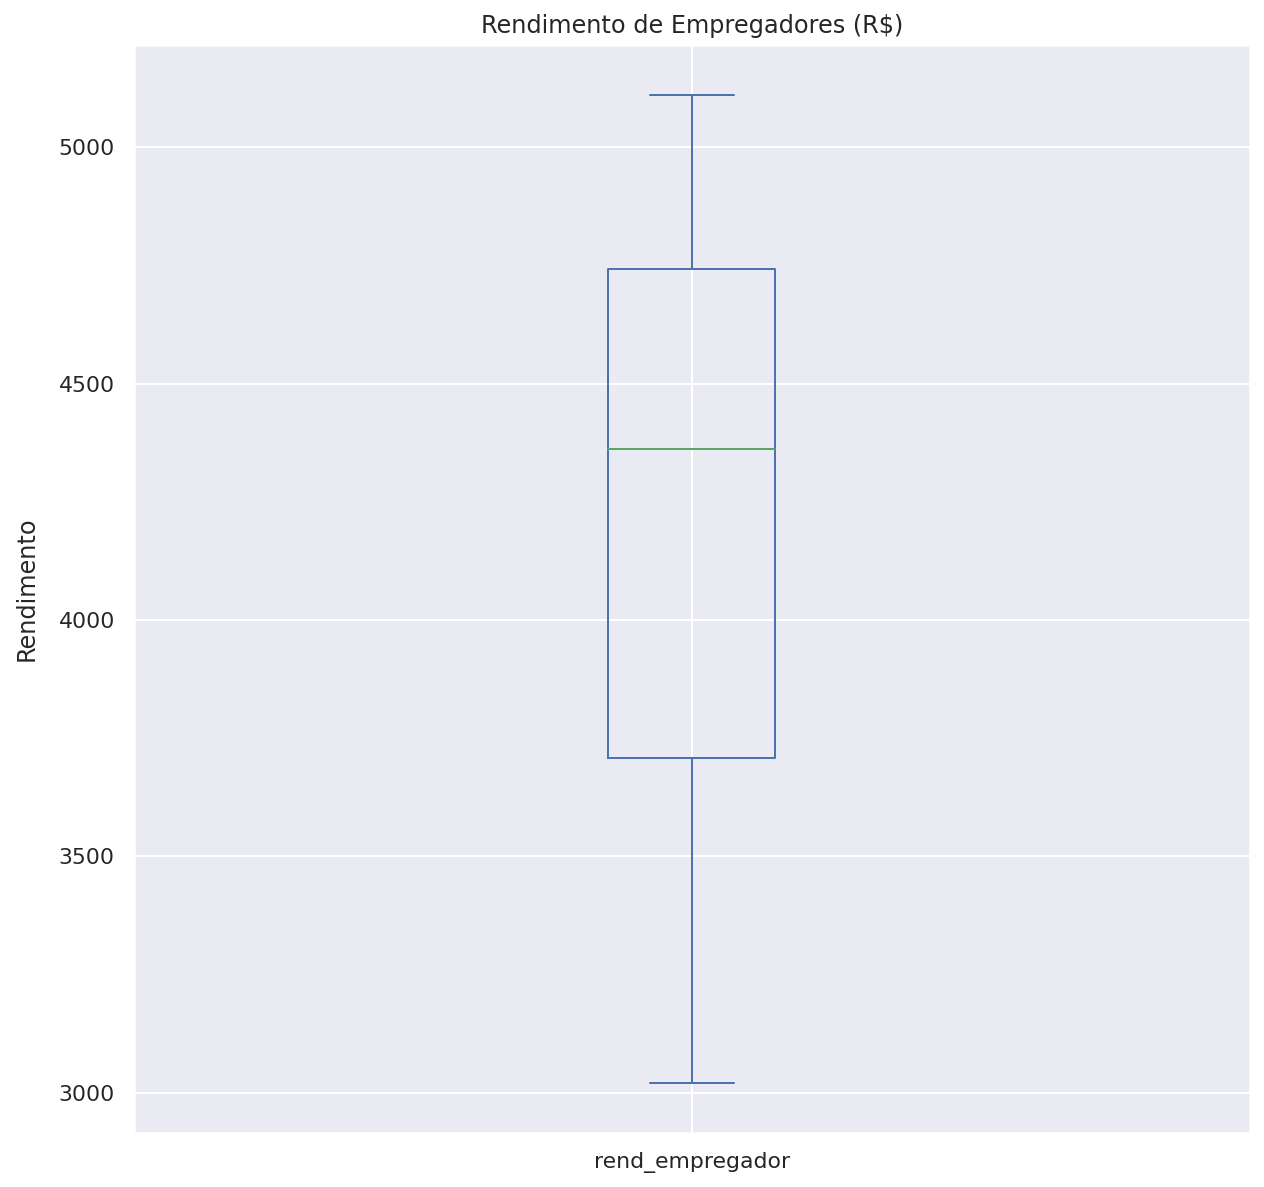

In [434]:
# Renda por empregador 
ax = rend_empregador.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Rendimento')
ax.set_title('Rendimento de Empregadores (R$)')

plt.show()

## Escolaridade

In [435]:
escolaridade_por_estado = df.groupby(
        by='Estado'
    )['adult_fundament_incomp', 'adult_medio_incomp', 'adult_sup_incomp', 'adult_sup_completo'].mean()

escolaridade_por_estado

<ipython-input-435-744edb2f747a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  escolaridade_por_estado = df.groupby(


,adult_fundament_incomp,adult_medio_incomp,adult_sup_incomp,adult_sup_completo
Estado,,,,
Acre,8629.000000,1876.727273,3477.727273,1383.363636
Alagoas,10027.117647,1765.843137,2848.637255,1087.990196
Amapá,8056.187500,2617.500000,6321.375000,2074.937500
Amazonas,12549.467742,3604.290323,7736.370968,2153.822581
Bahia,10888.035971,2186.366906,4376.489209,1197.112710
Ceará,14261.483696,3362.293478,5509.902174,1788.532609
Distrito Federal,451003.000000,210195.000000,470597.000000,358275.000000
Espírito Santo,13154.128205,3828.679487,6667.641026,2948.576923
Goiás,7052.768293,2136.256098,3449.617886,1449.621951


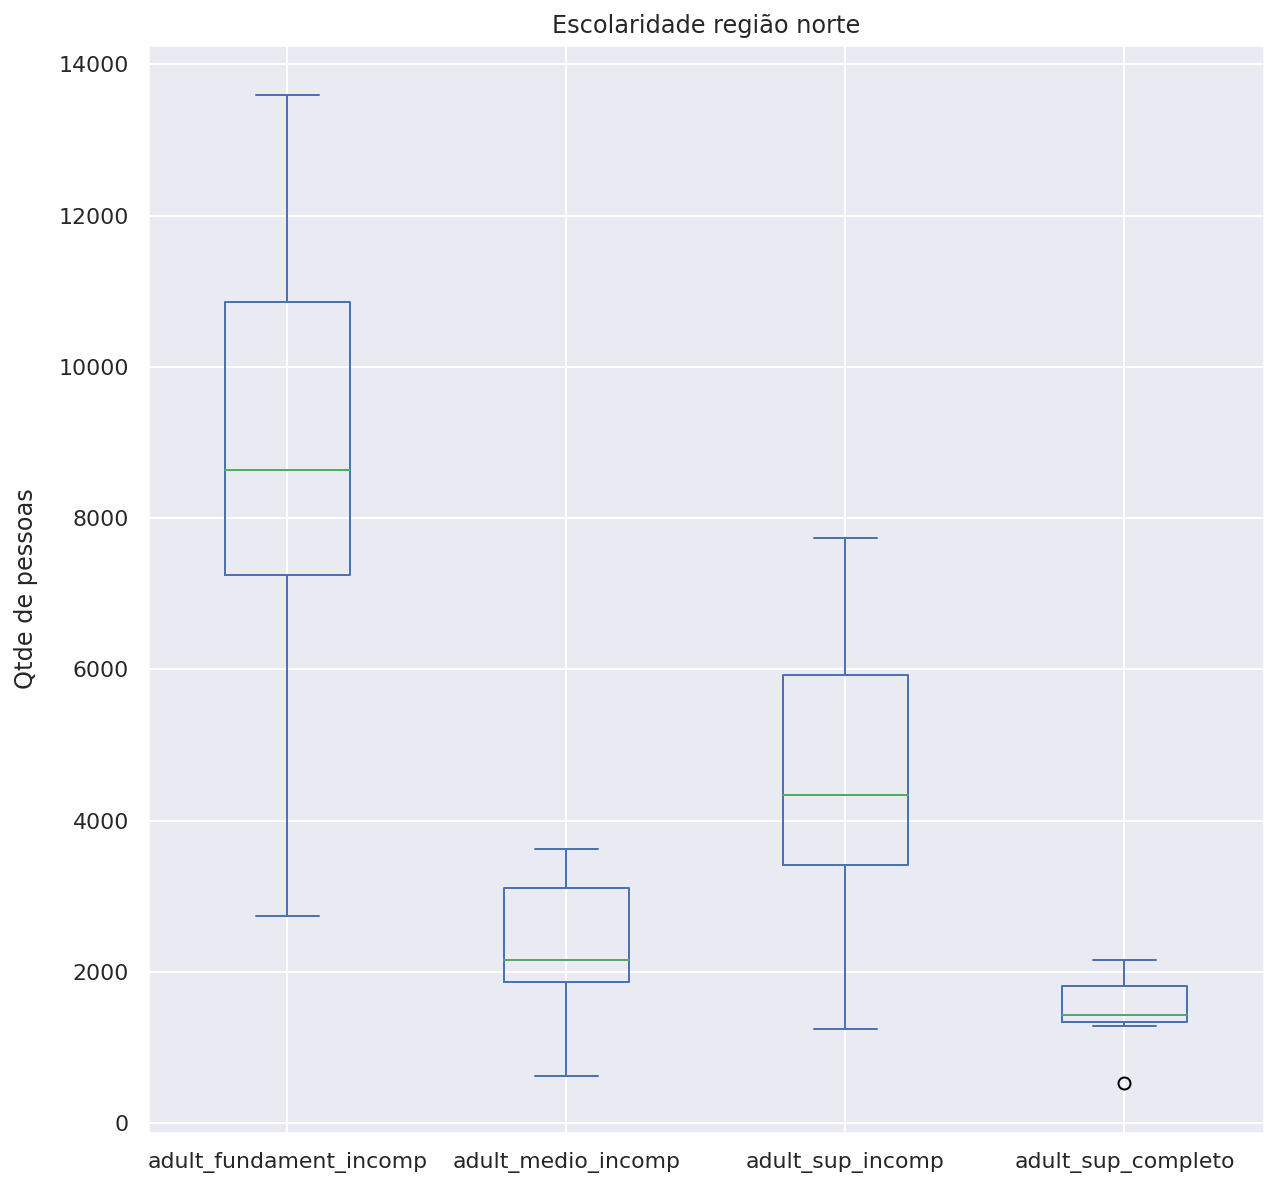

In [436]:
ax = escolaridade_por_estado.loc[
    ['Acre', 'Rondonia', 'Amazonas', 'Pará', 'Roraima','Amapá', 'Tocantins']
].plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('Qtde de pessoas')
ax.set_title('Escolaridade região norte')

plt.show()

In [ ]:
# pair plot renda vs escolaridade

cols = ['adult_fundament_incomp', 'adult_medio_incomp', 'adult_sup_incomp', 'adult_sup_completo', 'rend_empreg_clt', 'rend_funcpubl', 'rend_empreg_nclt', 'rend_autonomos', 'rend_empregador']

sns.pairplot(df[cols],
             plot_kws={'alpha': 0.5})

# Regressão Linear

In [ ]:
df = df.drop(['estud_f1',	'estud_f2',	'estud_f3',	'estud_f4',	'estud_f5',	'estud_f6',	'estud_f7',	'estud_f8',	'estud_f9',	'estud_f10',	'estud_f11',	'estud_f12',	'estud_f13',	'estud_f14'], axis=1)

In [ ]:
df = df.drop([ 'nestud_f1',	'nestud_f2',	'nestud_f3',	'nestud_f4',	'nestud_f5',	'nestud_f6',	'nestud_f7',	'nestud_f8',	'nestud_f9',	'nestud_f10',	'nestud_f11',	'nestud_f12',	'nestud_f13',	'nestud_f14'], axis=1)

In [ ]:
df = df.drop(['aposent_ocup',	'aposent_nocup',	'naposent_ocup',	'naposent_nocup',	'contrib_prev',	'ncontrib_prev', 'freq_creche_pub',	'freq_preescola_pub',
              'freq_alfabetizacao_pub',	'freq_eja_pub',	'freq_fundamental_pub',	'freq_medio_pub',	'freq_superior_pub',	'freq_pos_pub',	'freq_creche_priv',	
              'freq_preescola_priv',	'freq_alfabetizacao_priv',	'freq_eja_priv',	'freq_fundamental_priv',	'freq_medio_priv',	'freq_superior_priv',	
              'freq_pos_priv', 'quant_urbano',	'quant_rural'], axis=1)


In [ ]:
df.corr(method='pearson')

In [ ]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr())

In [ ]:
df

In [ ]:
Y = df[['est_rec']]
X = df.drop(['est_rec', 'Estado','Cidade'],  axis=1)

In [ ]:
X.describe()

In [ ]:
Y.describe()

In [ ]:
X

In [ ]:
import statsmodels.api as sml
from statsmodels import tools

X_new = tools.add_constant(X)

regressor_OLS = sml.OLS(endog = Y, exog =  X_new).fit()

regressor_OLS.summary()

In [ ]:
# importação da classe LinearRegression
from sklearn.linear_model import LinearRegression

In [ ]:
#  definição o modelo de regressão linear
X = df[['creche_int']]
y = df['est_rec']
model = LinearRegression().fit(X, y)

In [ ]:
# coeficientes da regressão
print('Intercepto:', model.intercept_)
print('Inclinação:', model.coef_)


In [ ]:
# visualizando o modelo de regressão linear juntamente com os dados
sns.regplot(x='creche_int', y='est_rec', data=df)
plt.show()


In [ ]:
# avaliando o desempenho do modelo
r_squared = model.score(X, y)
print('Coeficiente de Determinação R²:', r_squared)
